## Observations and Insights 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer' )
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
# Checking the number of mice.
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_metadata.duplicated(subset=['Mouse ID']).unique()

clean_mouse_df = mouse_metadata[mouse_metadata['Mouse ID'].isin(duplicate_mice)==False]
clean_study_df = study_results[study_results['Mouse ID'].isin(duplicate_mice)==False]
clean_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [49]:
# Optional: Get all the data for the duplicate mouse ID. 

In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df = pd.merge(clean_mouse_df, clean_study_df, on='Mouse ID')
combined_df
sorted_df = combined_df.sort_values('Timepoint', ascending=True)
# sorted_df
refined_sorted = sorted_df.reset_index()
del refined_sorted['index']
refined_sorted.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s619,Stelasyn,Male,22,30,0,45.0,0
2,a818,Naftisol,Female,12,28,0,45.0,0
3,t198,Propriva,Male,22,26,0,45.0,0
4,a788,Zoniferol,Male,5,30,0,45.0,0


In [51]:
# Checking the number of mice in the clean DataFrame.
refined_sorted['Mouse ID'].count()


1893

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_grouped = refined_sorted.groupby(['Drug Regimen'])
regimen_grouped.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s619,Stelasyn,Male,22,30,0,45.0,0
2,a818,Naftisol,Female,12,28,0,45.0,0
3,t198,Propriva,Male,22,26,0,45.0,0
4,a788,Zoniferol,Male,5,30,0,45.0,0
5,t451,Stelasyn,Male,8,29,0,45.0,0
6,a699,Propriva,Female,5,28,0,45.0,0
7,a685,Infubinol,Male,8,30,0,45.0,0
8,t573,Ceftamin,Female,15,27,0,45.0,0
9,t718,Placebo,Female,10,30,0,45.0,0


In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = regimen_grouped['Tumor Volume (mm3)'].mean()
tumor_median = regimen_grouped['Tumor Volume (mm3)'].median()
tumor_variance = regimen_grouped['Tumor Volume (mm3)'].var()
tumor_sd = regimen_grouped['Tumor Volume (mm3)'].std()
tumor_sem = regimen_grouped['Tumor Volume (mm3)'].sem()
tumor_vol = regimen_grouped['Tumor Volume (mm3)'].sum()

sum_stats = pd.DataFrame({
    'Total Tumor Volume': tumor_vol,
    'Mean': tumor_mean,
    'Median': tumor_median,
    'Variance': tumor_variance,
    'Standard Deviation': tumor_sd,
    'SEM': tumor_sem
})

sum_stats['Total Tumor Volume'] = sum_stats['Total Tumor Volume'].map('{:,.2f}'.format)
sum_stats['Mean'] = sum_stats['Mean'].map('{:,.2f}'.format)
sum_stats['Median'] = sum_stats['Median'].map('{:,.2f}'.format)
sum_stats['Variance'] = sum_stats['Variance'].map('{:,.2f}'.format)
sum_stats['Standard Deviation'] = sum_stats['Standard Deviation'].map('{:,.2f}'.format)
sum_stats['SEM'] = sum_stats['SEM'].map('{:,.2f}'.format)

sum_stats
# This method produces everything in a single groupby function


,Total Tumor Volume,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,"9,355.42",40.68,41.56,24.95,4.99,0.33
Ceftamin,"9,361.23",52.59,51.78,39.29,6.27,0.47
Infubinol,"9,413.49",52.88,51.82,43.13,6.57,0.49
Ketapril,"10,384.30",55.24,53.70,68.55,8.28,0.60
Naftisol,"10,105.67",54.33,52.51,66.17,8.13,0.60
Placebo,"9,780.08",54.03,52.29,61.17,7.82,0.58
Propriva,"8,423.93",52.32,50.85,42.35,6.51,0.51
Ramicane,"9,169.42",40.22,40.67,23.49,4.85,0.32
Stelasyn,"9,816.20",54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

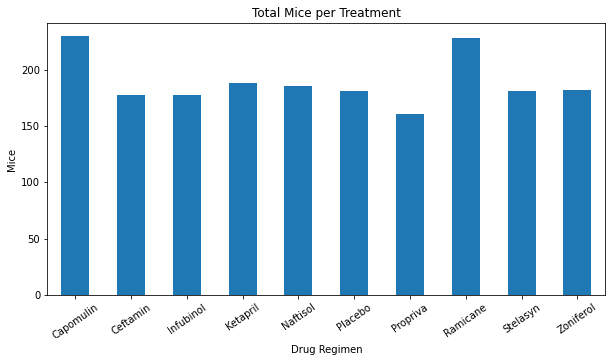

<Figure size 432x288 with 0 Axes>

In [54]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice_data_points = refined_sorted.groupby(['Drug Regimen']).count()['Mouse ID']
# print(data_points)

total_mice_bar = total_mice_data_points.plot(kind='bar', figsize=(10,5), rot=35)
plt.title('Total Mice per Treatment')
plt.ylabel('Mice')

plt.show()
plt.tight_layout()

In [55]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
print(total_mice_data_points)


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


Text(0, 0.5, 'Mice')

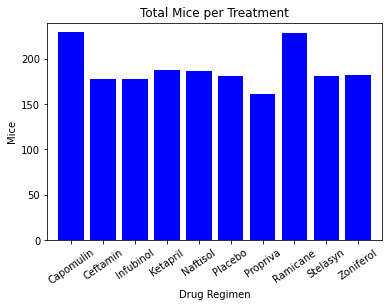

In [75]:
users = [230,178,178,188,186,181,161,228,181,182]

x_axis = np.arange(len(total_mice_data_points))

plt.bar(x_axis, users, color='blue', align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [
    'Capomulin', 
    'Ceftamin', 
    'Infubinol', 
    'Ketapril', 
    'Naftisol', 
    'Placebo', 
    'Propriva', 
    'Ramicane', 
    'Stelasyn', 
    'Zoniferol'
],  rotation=35)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Total Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")

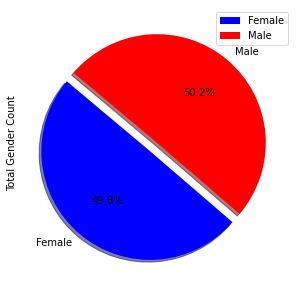

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_grouped = refined_sorted.groupby(['Mouse ID', 'Sex'])
# gender_grouped.head()

gender_grouped_df = pd.DataFrame(gender_grouped.size())
gender_grouped_df.head()

gender_count_df = pd.DataFrame(gender_grouped_df.groupby(['Sex']).count())
gender_count_df.columns = ['Total Gender Count']

gender_count_df['Percentage of Gender'] = (gender_count_df['Total Gender Count']/gender_count_df['Total Gender Count'].sum())*100

colors = ['blue', 'red']
explode = (0.1, 0)
plot = gender_count_df.plot.pie(y='Total Gender Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1762367126898932,
 1.1254463310846248,
 -1.190308764526366,
 1.124996700756096)

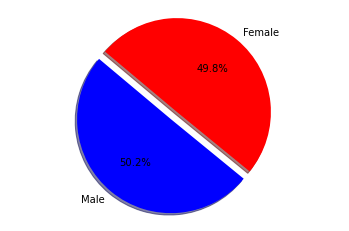

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']
sizes = [50.200803,49.799197]
colors = ['blue', 'red']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_regimes = refined_sorted[refined_sorted["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_regimes = top_regimes.sort_values(["Timepoint"], ascending=True)
top_regimes

top_regimes_data = top_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

top_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
208,Ramicane,c758,0,45.000000
204,Ceftamin,f436,0,45.000000
193,Ceftamin,p438,0,45.000000
181,Infubinol,f345,0,45.000000
...,...,...,...,...
1822,Ramicane,r811,45,37.225650
1823,Infubinol,a685,45,66.083066
1826,Capomulin,w914,45,36.041047
1831,Ramicane,d251,45,37.311236


In [60]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [62]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [63]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
